##**Import Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential

##**Load data and preprocessing**

In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Data Normalization
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [ ]:
# Reshape data
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

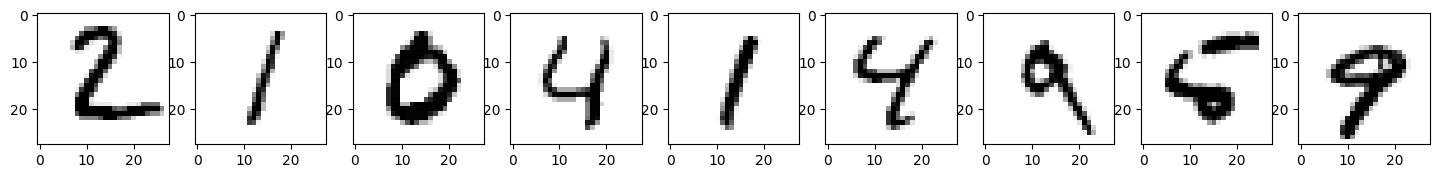

In [ ]:
# Displaying images with no noise
plt.figure(figsize=(20, 2))
for i in range(1,10):
    ax = plt.subplot(1, 10, i)
    plt.imshow(x_test[i], cmap="binary")
plt.show()


##**Generate noise**

In [ ]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

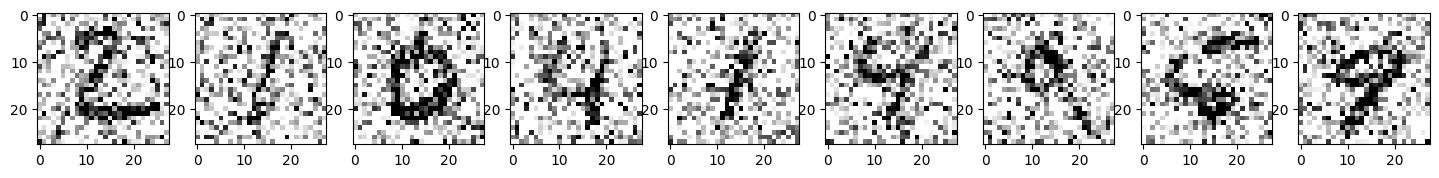

In [ ]:
# Displaying images with noise
plt.figure(figsize=(20, 2))
for i in range(1,10):
    ax = plt.subplot(1, 10, i)
    plt.imshow(x_test_noisy[i], cmap="binary")
plt.show()

##**AutoEncoder Model Structure**

In [ ]:
model = Sequential()
# Encoder
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))

# Decoder
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(UpSampling2D((2, 2)))

model.add(Conv2D(1, (3, 3), activation='relu', padding='same'))

In [ ]:
# Compile
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Get model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         2312      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 8)           0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 8)           584       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 8)           0

##**Training**

In [ ]:
model.fit(x_train_noisy, x_train, epochs=50, batch_size=256, shuffle=True,
          validation_data=(x_test_noisy, x_test))

Epoch 1/50
235/235 [==============================] - 10s 14ms/step - loss: 0.0559 - val_loss: 0.0406
Epoch 2/50
235/235 [==============================] - 2s 9ms/step - loss: 0.0365 - val_loss: 0.0333
Epoch 3/50
235/235 [==============================] - 2s 9ms/step - loss: 0.0320 - val_loss: 0.0303
Epoch 4/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0296 - val_loss: 0.0282
Epoch 5/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0280 - val_loss: 0.0270
Epoch 6/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0269 - val_loss: 0.0260
Epoch 7/50
235/235 [==============================] - 2s 9ms/step - loss: 0.0260 - val_loss: 0.0252
Epoch 8/50
235/235 [==============================] - 2s 9ms/step - loss: 0.0253 - val_loss: 0.0247
Epoch 9/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0246 - val_loss: 0.0239
Epoch 10/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0240 - val_loss: 0.0

###**Evaluation**

In [ ]:
model.evaluate(x_test_noisy, x_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0184


0.01840871572494507

###**Prediction**

In [ ]:
no_noise_img = model.predict(x_test_noisy)

313/313 [==============================] - 1s 2ms/step


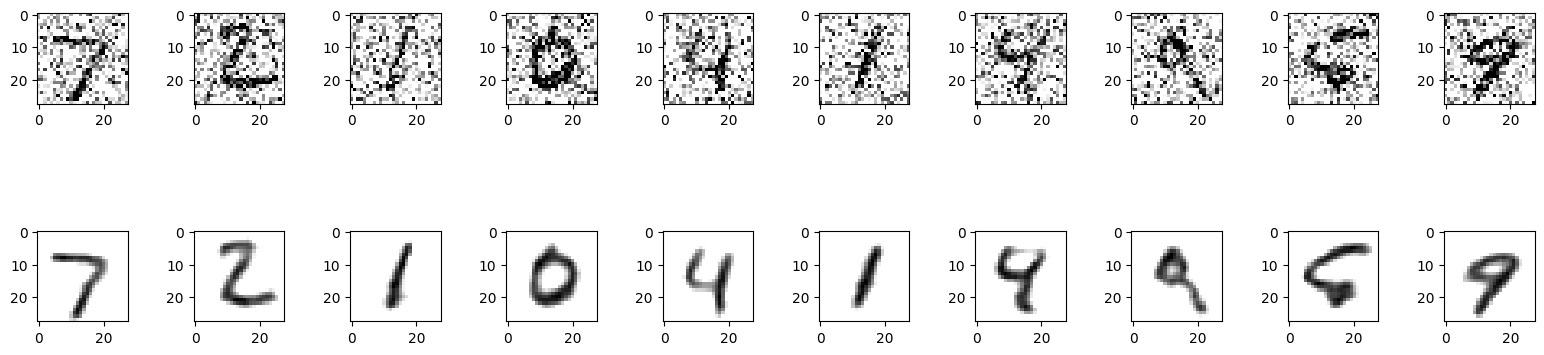

(0.0, 1.0, 0.0, 1.0)

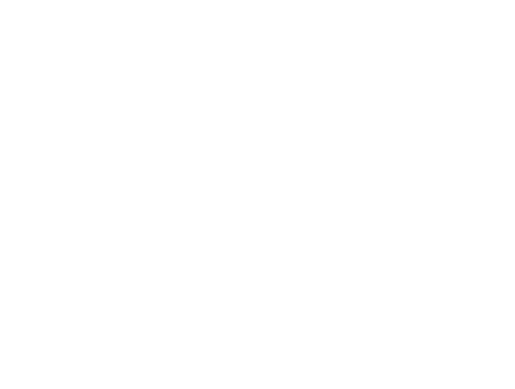

In [ ]:
plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(x_test_noisy[i], cmap="binary")

    # display reconstructed (after noise removed) image
    ax = plt.subplot(3, 20, 40 +i+ 1)
    plt.imshow(no_noise_img[i], cmap="binary")

plt.show()
plt.axis('Off')